In [198]:
from Bio import SeqIO
from Bio.SeqIO import AbiIO
import os

In [199]:
seq_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.seq']
seq_files

['0-Mn-fw-EM-28.seq',
 '0-Mn-re-EM-27.seq',
 '15-Mn-fw-EM-28.seq',
 '15-Mn-re-EM-27.seq',
 '20-Mn-Fw-EM-28.seq',
 '20-Mn-re-EM-27.seq',
 '25-Mn-fw-EM-28.seq',
 '25-Mn-re-EM-27.seq',
 '30-Mn-fw-EM-28.seq',
 '30-Mn-re-EM-27.seq',
 '35-Mn-fw-EM-28.seq',
 '35-Mn-re-EM-27.seq',
 '55-Mn-fw-EM-28.seq',
 '55-Mn-re-EM-27.seq']

In [200]:
abi_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.ab1']
abi_files

['0-Mn-fw-EM-28.ab1',
 '0-Mn-re-EM-27.ab1',
 '15-Mn-fw-EM-28.ab1',
 '15-Mn-re-EM-27.ab1',
 '20-Mn-Fw-EM-28.ab1',
 '20-Mn-re-EM-27.ab1',
 '25-Mn-fw-EM-28.ab1',
 '25-Mn-re-EM-27.ab1',
 '30-Mn-fw-EM-28.ab1',
 '30-Mn-re-EM-27.ab1',
 '35-Mn-fw-EM-28.ab1',
 '35-Mn-re-EM-27.ab1',
 '55-Mn-fw-EM-28.ab1',
 '55-Mn-re-EM-27.ab1']

In [201]:
sequences = []
traces = []
for f in seq_files:
    seq = SeqIO.read(f, 'fasta')
    seq.id = f
    seq.name = f
    seq.description = f
    sequences.append(seq)
    
sequences

[SeqRecord(seq=Seq('CNNNNNAANGNGNANNNNAANTCNTNNNNNNNNAACTNNNNNNNNNNNNNNNNN...NNN', SingleLetterAlphabet()), id='0-Mn-fw-EM-28.seq', name='0-Mn-fw-EM-28.seq', description='0-Mn-fw-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNTNNNNACNGNCNNNANNNCTGACAATATCTTATTCATCCTCNATGAT...NNN', SingleLetterAlphabet()), id='0-Mn-re-EM-27.seq', name='0-Mn-re-EM-27.seq', description='0-Mn-re-EM-27.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNCNNNNNNNNNNNNNNNNNNANNATCCTNNAGNANATCTTATTCNTNGNGGA...NGN', SingleLetterAlphabet()), id='15-Mn-fw-EM-28.seq', name='15-Mn-fw-EM-28.seq', description='15-Mn-fw-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNCNNANNNNNNNNNCACTNNNNNCACNNAACNNAATGCTTTTTCTCGAGGG...NNN', SingleLetterAlphabet()), id='15-Mn-re-EM-27.seq', name='15-Mn-re-EM-27.seq', description='15-Mn-re-EM-27.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('ANNNNNNNCTNNNNNANANNATANNACATCNCNNNTATGGATCNCANNGAGATT...NNN', SingleLetterAlphabet()), id='20-Mn-Fw-EM-28.seq', name='20-Mn-Fw-EM-28.seq', description='20-Mn

In [224]:
# Open the original sequence
original = SeqIO.read('../../data/victoria-pb2.fasta', 'fasta')
original = original[1600:]
original

SeqRecord(seq=Seq('AGAGACTGACAATAACTTATTCATCGTCGATGATGTGGGAGATTAACGGTCCTG...TAC', SingleLetterAlphabet()), id='A/Victoria/361/2011|KJ942687', name='A/Victoria/361/2011|KJ942687', description='A/Victoria/361/2011|KJ942687', dbxrefs=[])

In [225]:
# Write the "fw" to disk
fw_sequences = [s for s in sequences if '-fw-' in s.id]
fw_sequences.append(original)
SeqIO.write(fw_sequences, 'forward.fasta', 'fasta')
# fw_sequences

7

In [226]:
re_sequences = [s for s in sequences if '-re' in s.id or '-Re-' in s.id]
SeqIO.write(re_sequences, 'reverse.fasta', 'fasta')

7

In [230]:
from Bio.Align.Applications import ClustalOmegaCommandline

cline = ClustalOmegaCommandline(infile='forward.fasta', outfile='forward.aligned.fasta', verbose=True, auto=True, force=True)
cline()

('Using 4 threads\nRead 7 sequences (type: DNA) from forward.fasta\nnot more sequences (7) than cluster-size (100), turn off mBed\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Enabling mBed.\nAuto settings: Setting iteration to 1.\nUsing 6 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 7 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 27)\nKtuple-distance calculation progress: 3 % (1 out of 27)\nKtuple-distance calculation progress: 7 % (2 out of 27)\nKtuple-distance calculation progress: 11 % (3 out of 27)\nKtuple-distance calculation progress: 29 % (8 out of 27)\nKtuple-distance calculation progress: 51 % (14 out of 27)\nKtuple-distance calculation progress done. CPU time: 0.01u 0.00s 00:00:00.01 Elapsed: 00:00:00\nmBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)\nDistan

In [231]:
from Bio import AlignIO

aln = AlignIO.read('forward.aligned.fasta', 'fasta')
print(aln[:, 100:-100])

SingleLetterAlphabet() alignment with 7 rows and 712 columns
GAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTG...NNN 0-Mn-fw-EM-28.seq
GAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTG...ANN 15-Mn-fw-EM-28.seq
TGGTACCTCTAGAGTNNTACCTATCAATGGATCATCAGAAATTG...--- 25-Mn-fw-EM-28.seq
GACCTTGTTTCTACACGCGTGGTACCTCTAGAGTACAGAAATTG...ANN 30-Mn-fw-EM-28.seq
GAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTG...NNA 35-Mn-fw-EM-28.seq
NGNTCGGTTTTGGTCANTACCTATCAATGGATCATCAGAAATTG...--- 55-Mn-fw-EM-28.seq
GAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTG...--- A/Victoria/361/2011|KJ942687


In [232]:
from Levenshtein import distance

In [233]:
# Analyze the forward sequences
mn_00 = aln[2].seq
mn_25 = aln[0].seq
mn_55 = aln[1].seq

print(distance(str(original[150:-150].seq), str(mn_00[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_25[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_55[150:-150]), ))

218
176
236


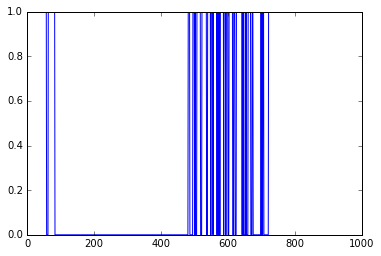

In [234]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
num_gaps = []
window_length = 5
for pos in range(aln.get_alignment_length()):
    temp_aln = aln[:, pos:pos+window_length]
    letters = Counter()
    for i in range(temp_aln.get_alignment_length()):
        letters = letters + Counter(temp_aln[:, i])
    # letters = Counter(aln[:, pos:pos+10])
    
    
    b = bool(int((letters['-'] + letters['N'])/window_length))
    num_gaps.append(b)
plt.plot(num_gaps)
# plt.ylim(-1, 3)

In [235]:
# identify the longest sequence of zeros amongst smoothed out data.
from itertools import groupby

def find_midpoint_of_longest_zeros(num_gaps):
    idx_longest_zeros = 0
    longest_zeros = [0]
    pos_counter = 0
    for i, (elm, grp) in enumerate(groupby(num_gaps)):
        grp = list(grp)
        if not elm and len(grp) > len(longest_zeros):
            longest_zeros = grp
            idx_longest_zeros = pos_counter
        pos_counter += len(grp)
    
    return int((idx_longest_zeros + len(longest_zeros)) / 2)

find_midpoint_of_longest_zeros(num_gaps)

240

In [236]:
midpt = find_midpoint_of_longest_zeros(num_gaps)

In [237]:
import pymc3 as pm
import numpy as np

In [253]:
positions = np.arange(0, len(num_gaps))
with pm.Model() as model:
    switchpoint1 = pm.DiscreteUniform('switchpoint1', lower=0, upper=midpt)
    switchpoint2 = pm.DiscreteUniform('switchpoint2', lower=midpt, upper=len(num_gaps))
    
    p = pm.Uniform('p1', lower=0, upper=1, shape=4)

    rate1 = pm.math.switch(positions < switchpoint1, p[0], p[1])
    rate2 = pm.math.switch(positions > switchpoint2, p[2], p[3])
    
    mutations1 = pm.Bernoulli('mutations1', p=rate1, observed=num_gaps)
    mutations2 = pm.Bernoulli('mutations2', p=rate2, observed=num_gaps)

Applied interval-transform to p1 and added transformed p1_interval_ to model.


In [256]:
with model:
    step1 = pm.NUTS([p])

    # Use Metropolis for switchpoint, and missing values since it accommodates discrete variables
    step2 = pm.Metropolis([switchpoint1, switchpoint2])
    start = pm.find_MAP()
    trace = pm.sample(5000, start=start, step=[step1, step2])

 [-------100%-------] 5000 of 5000 in 8.4 sec. | SPS: 596.6 | ETA: 0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1648ce710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x166d1a128>]], dtype=object)

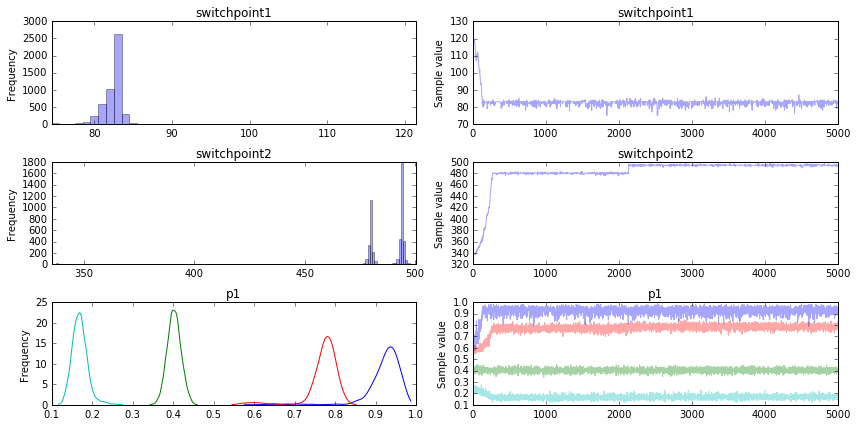

In [257]:
pm.traceplot(trace)

In [258]:
burnin = 1000
start = int(trace['switchpoint1'][burnin:].max(axis=0))
start

87

In [259]:
end = int(trace['switchpoint2'][burnin:].min(axis=0))
end

475

In [260]:
aln_trimmed = aln[:, start:end]
concs = []
muts = []
for i in range(len(aln_trimmed) - 1):
    dist = distance(str(aln_trimmed[i].seq), str(aln_trimmed[-1].seq))
    print(aln_trimmed[i].id, dist)
    
    concs.append(aln_trimmed[i].id.split('-')[0])
    muts.append(dist)

0-Mn-fw-EM-28.seq 0
15-Mn-fw-EM-28.seq 16
25-Mn-fw-EM-28.seq 23
30-Mn-fw-EM-28.seq 40
35-Mn-fw-EM-28.seq 7
55-Mn-fw-EM-28.seq 11


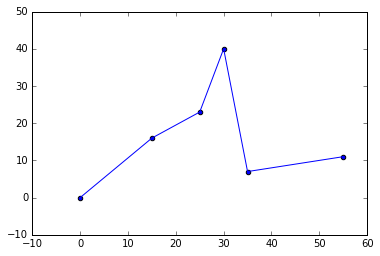

In [261]:
plt.scatter(x=concs, y=muts)
plt.plot(concs, muts)